In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

C:\anaconda\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [46]:
df = pd.read_csv('credit.csv', index_col=0) #gets rid of the index column (unnamed column)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


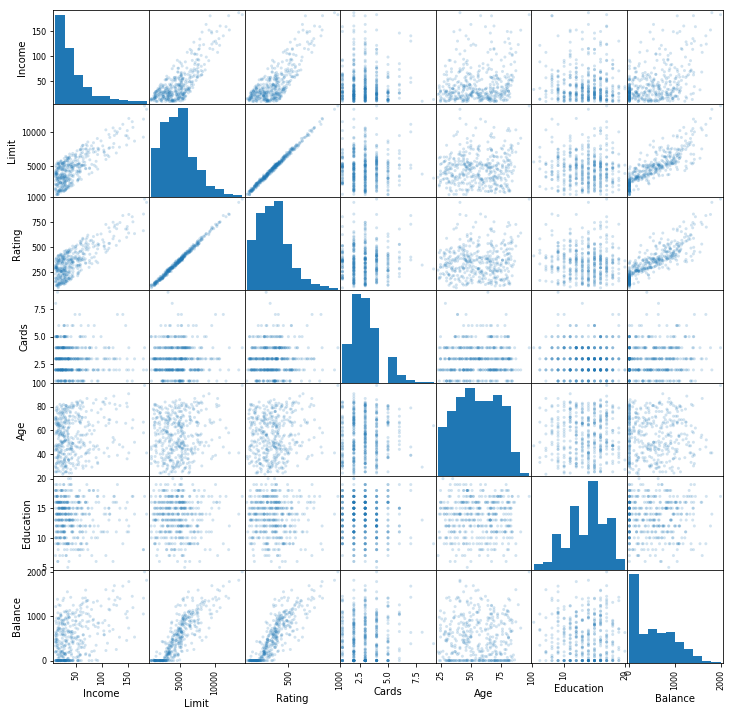

In [8]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))
None # gets rid of the numbers that would otherwise show up

Limit and Rating looks linear when graphed against Balance
Income, Limit,Rating, Cards are skewed to the left
Age - shows kertosis

In [12]:
y=df.Balance #y is lower case because it is a vector (1Dimensional) these are rules of Linear Regression
X=df.Limit   # X is upper case because it is a matrix (at least 2D)

In [14]:
model=sm.OLS(y,X).fit() #use fit for training stage

In [15]:
model.params

Limit    0.121655
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     2317.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          2.98e-168
Time:                        11:45:16   Log-Likelihood:                -2800.9
No. Observations:                 400   AIC:                             5604.
Df Residuals:                     399   BIC:                             5608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Limit          0.1217      0.003     48.131      0.000       0.117       0.127
==============================================================================
Omnibus:                       25.956   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.386
Skew:                           0.659   Prob(JB):                     4.16e-07
Kurtosis:                       3.166   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To assess how good the model predicts:
Look at R2. This should be close to 1
Look at the probability of the F-statistics - you want to make sure this is really low
Also make sure P>[t] for Limit is less than that alpha (ex. 0.05)

y-intercept is 0 so it isn't showing up

In [18]:
#add a y intercept, since it isn't  in the model right now
y=df.Balance
X=df.Limit
X=sm.add_constant(X)
X.head(3)

,const,Limit
1,1.0,3606
2,1.0,6645
3,1.0,7075


In [19]:
model=sm.OLS(y,X).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          2.53e-119
Time:                        11:51:13   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.676
Skew:                           0.418   Prob(JB):                     4.87e-08
Kurtosis:                       4.150   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the constant (beta 0) is telling you -- if your limit is 0 you balnce is negative $292

In [27]:
X = df[[ 'Limit', 'Rating']].astype(float)
X=sm.add_constant(X)

In [28]:
model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          7.57e-119
Time:                        11:58:30   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -377.5368     45.254     -8.343      0.0

In [29]:
X = df[[ 'Limit', 'Rating']].astype(float)
model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1322.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.65e-176
Time:                        13:16:58   Log-Likelihood:                -2777.6
No. Observations:                 400   AIC:                             5559.
Df Residuals:                     398   BIC:                             5567.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Limit          0.4324      0.044      9.728      0.0

In [30]:
X = df[[ 'Income', 'Limit', 'Rating']].astype(float)
model_3 = sm.OLS(y,X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.95e-211
Time:                        13:17:23   Log-Likelihood:                -2693.9
No. Observations:                 400   AIC:                             5394.
Df Residuals:                     397   BIC:                             5406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -6.7320      0.469    -14.361      0.0

In [31]:
X = df[[ 'Income', 'Limit', 'Rating']].astype(float)
X=sm.add_constant(X)
model_3 = sm.OLS(y,X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          3.20e-179
Time:                        13:18:01   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.7275     32.099    -15.257      0.0

In [32]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [33]:
df[df.Balance <10].describe().T #T=Transform - filts the axes

,count,mean,std,min,25%,50%,75%,max
Income,92.0,28.857337,15.330384,10.363,17.856,27.14,34.87325,92.112
Limit,92.0,2156.576087,757.215202,855.000,1541.750,2135.00,2591.25000,4612.000
Rating,92.0,182.532609,49.054231,93.000,144.500,180.00,207.00000,344.000
Cards,92.0,2.826087,1.144588,1.000,2.000,3.00,3.00000,6.000
Age,92.0,56.391304,17.189287,24.000,41.000,57.50,71.25000,84.000
Education,92.0,13.554348,2.814266,6.000,11.000,14.00,16.00000,19.000
Balance,92.0,0.141304,0.978691,0.000,0.000,0.00,0.00000,8.000


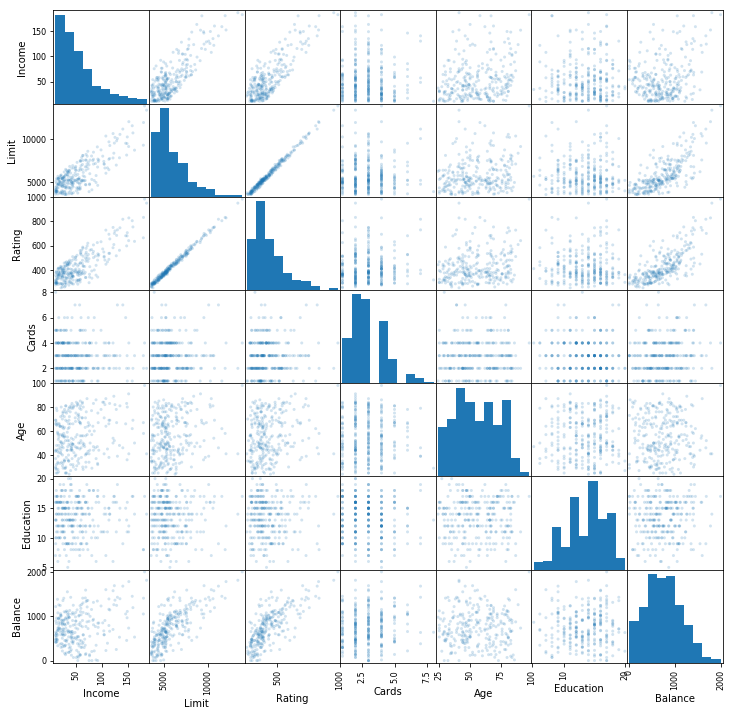

In [34]:
df_new = df[df['Limit'] > 3500] 
scatter_matrix(df_new, alpha=0.2, figsize=(12,12))
None

In [36]:
df_new.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [40]:
X = df_new[[ 'Income', 'Limit', 'Rating']].astype(float)
y= df_new.Balance

In [41]:
model_4 = sm.OLS(y,X).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1321.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.31e-158
Time:                        13:33:02   Log-Likelihood:                -1807.6
No. Observations:                 267   AIC:                             3621.
Df Residuals:                     264   BIC:                             3632.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -6.9951      0.534    -13.093      0.0

In [42]:
X = df_new[[ 'Income', 'Limit', 'Rating']].astype(float)
y= df_new.Balance
X=sm.add_constant(X)
model_4 = sm.OLS(y,X).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     466.3
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          6.25e-105
Time:                        13:34:05   Log-Likelihood:                -1729.1
No. Observations:                 267   AIC:                             3466.
Df Residuals:                     263   BIC:                             3481.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -681.0640     46.925    -14.514      0.0

In [43]:
def dummify(df, column):
    dummy = pd.get_dummies(df[column]).rename(columns= lambda x: column+'_'+str(x)).iloc[:,0:len(df[column].unique())-1]
    df=df.drop(column, axis=1)
    return pd.concat([df, dummy], axis=1)

In [47]:
df_2 = dummify(df, 'Gender')
df_2 = dummify(df_2, 'Married')
df_2 = dummify(df_2, 'Student')
df_2.head()

,Income,Limit,Rating,Cards,Age,Education,Ethnicity,Balance,Gender_ Male,Married_No,Student_No
1,14.891,3606,283,2,34,11,Caucasian,333,1,0,1
2,106.025,6645,483,3,82,15,Asian,903,0,0,0
3,104.593,7075,514,4,71,11,Asian,580,1,1,1
4,148.924,9504,681,3,36,11,Asian,964,0,1,1
5,55.882,4897,357,2,68,16,Caucasian,331,1,0,1


In [48]:
df_3=pd.get_dummies(df_2, dummy_na=True)
df_3.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Married_No,Student_No,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_nan
1,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0
2,106.025,6645,483,3,82,15,903,0,0,0,0,1,0,0
3,104.593,7075,514,4,71,11,580,1,1,1,0,1,0,0
4,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,0
5,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0


In [52]:
df_3.drop(['Ethnicity_African American'], axis=1).head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Married_No,Student_No,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_nan
1,14.891,3606,283,2,34,11,333,1,0,1,0,1,0
2,106.025,6645,483,3,82,15,903,0,0,0,1,0,0
3,104.593,7075,514,4,71,11,580,1,1,1,1,0,0
4,148.924,9504,681,3,36,11,964,0,1,1,1,0,0
5,55.882,4897,357,2,68,16,331,1,0,1,0,1,0


C:\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\anaconda\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


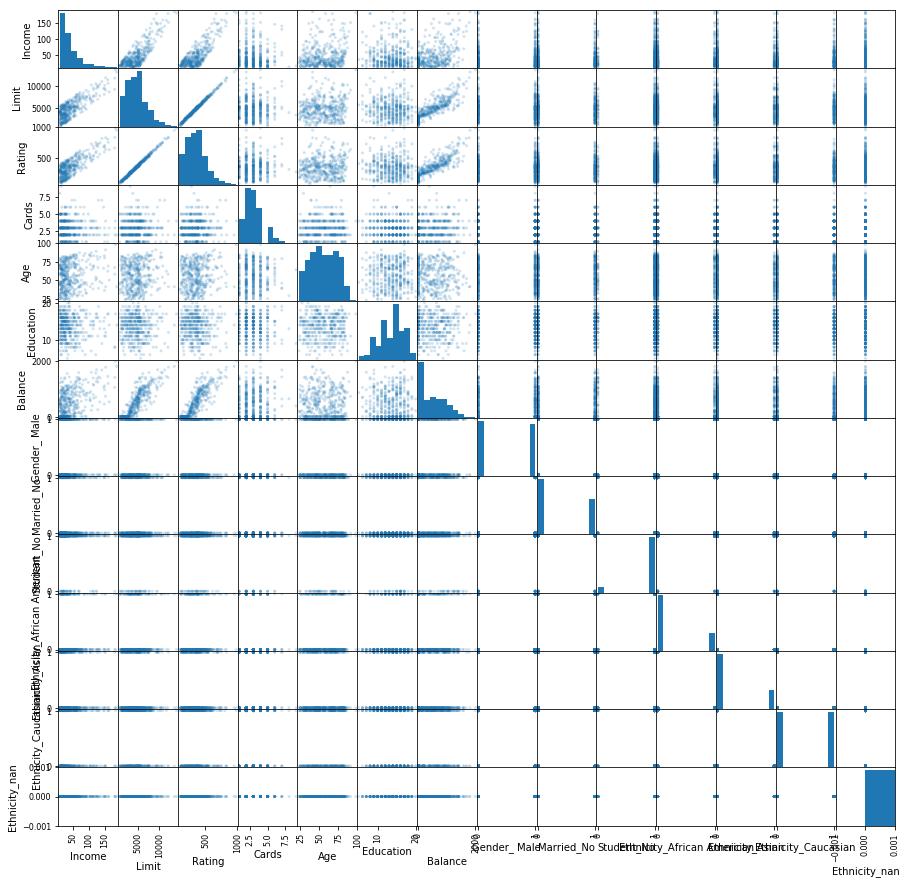

In [51]:
scatter_matrix(df_3, alpha=0.2, figsize=(15,15))
None

In [55]:
#Chyld'code for dummies
df = pd.read_csv('credit.csv', index_col=0)
df = df[df.Limit > 3500]
df['Student'] = df.Student.map({'No':0, 'Yes':1})
df['Married'] = df.Married.map({'No':0, 'Yes':1})
df['Ethnicity'] = df.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
df['Female'] = pd.get_dummies(df.Gender)['Female']
df.drop(['Gender'], axis=1, inplace=True)#inplace copy within the dataframe
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0


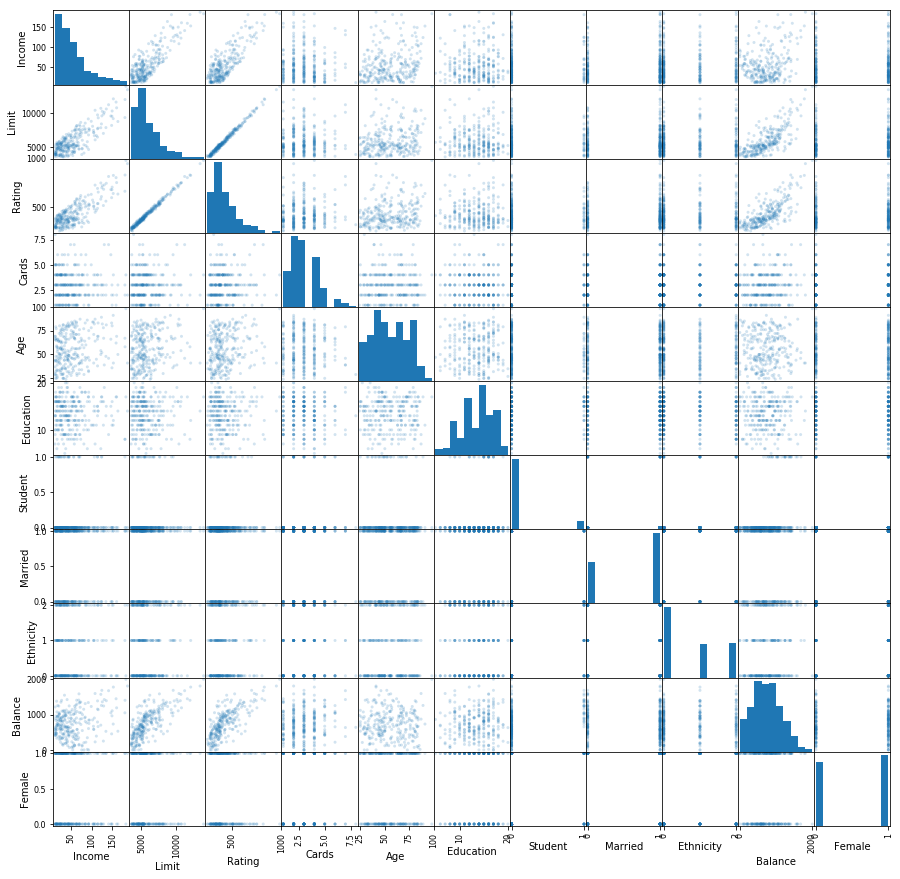

In [56]:
scatter_matrix(df, alpha=0.2, figsize=(15,15))
None

In [58]:
y = df ['Balance']
X = df[['Income','Limit', 'Cards', 'Age',   'Student']].astype(float) # make sure you cast int to float where necessary
X['const'] = 1
model_5 = sm.OLS(y,X).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.113e+04
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -1121.8
No. Observations:                 267   AIC:                             2256.
Df Residuals:                     261   BIC:                             2277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income        -9.8086      0.046   -213.324      0.000      -9.899      -9.718
Limit          0.3226      0.001    345.702      0.000       0.321       0.324
Cards         25.2190      0.719     35.067      0.000      23.803      26.635
Age           -1.1215      0.059    -19.091      0.000      -1.237      -1.006
Student      498.5362      3.275    152.245      0.000     492.088     504.984
const       -681.9631      5.237   -130.214      0.000    -692.276    -671.651
==============================================================================
Omnibus:                      260.835   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10359.769
Skew:                           3.800   Prob(JB):                         0.00
Kurtosis:                      32.554   Cond. No.                     3.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""